## Airbnb price forecast in Tokyo
I'll analyse and predict the staying fee by Airbnb.

### 1. Business Understanding
Question1 ... which area is more expensive at the center of Tokyo for staying via Airbnb?  
Question2 ... If an owner has good rating, is this house more expensive?  
Question3 ... If the house uses 'Futon', is the staying fee more expensive?

### 2. Data Understanding

#### Downloading the data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df_raw = pd.read_csv('listings.csv')
df = df_raw.copy()
df.head()

/Users/Waka/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35303,https://www.airbnb.com/rooms/35303,20190627141343,2019-06-27,"La Casa Gaienmae C Harajuku, Omotesando is nearby",This shared flat is locating at very close to ...,This apartment is 3 bedroom flat shared with t...,This shared flat is locating at very close to ...,none,10 min walking to Harajuku ~ Urahara ~ Omotesa...,...,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.20
1,197677,https://www.airbnb.com/rooms/197677,20190627141343,2019-06-27,Oshiage Holiday Apartment,NaN,"We are happy to welcome you to our apartment, ...","We are happy to welcome you to our apartment, ...",none,NaN,...,f,f,moderate,f,f,1,1,0,0,1.65
2,289597,https://www.airbnb.com/rooms/289597,20190627141343,2019-06-27,Private apt in central Tokyo #203,NaN,::::::::::::::::::::::::::::::::::::::::::::::...,::::::::::::::::::::::::::::::::::::::::::::::...,none,NaN,...,t,f,strict_14_with_grace_period,f,f,2,2,0,0,1.25
3,370759,https://www.airbnb.com/rooms/370759,20190627141343,2019-06-27,"Cozy flat #203, local area YET 10 mins to shib...","So close to busy centers, yet so peaceful! Jus...","Cozy and Relaxing, at home feeling in a reside...","So close to busy centers, yet so peaceful! Jus...",none,Peaceful and residential area just 10 mins awa...,...,f,f,strict_14_with_grace_period,f,f,3,3,0,0,1.55
4,700253,https://www.airbnb.com/rooms/700253,20190627141343,2019-06-27,Private apt in central Tokyo #201,NaN,::::::::::::::::::::::::::::::::::::::::::::::...,::::::::::::::::::::::::::::::::::::::::::::::...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,1.24


#### Checking each row

In [5]:
# Checking which row is displayed
pd.get_option("display.max_columns")

20

In [6]:
# Fixing the displayed row from 20 to 106
pd.set_option('display.max_columns', 106)

In [7]:
# Checking each row
df.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35303,https://www.airbnb.com/rooms/35303,20190627141343,2019-06-27,"La Casa Gaienmae C Harajuku, Omotesando is nearby",This shared flat is locating at very close to ...,This apartment is 3 bedroom flat shared with t...,This shared flat is locating at very close to ...,none,10 min walking to Harajuku ~ Urahara ~ Omotesa...,Current tenants are living in this flat over 2...,"5min to subway, 10min to JR stations, you can ...","Your private room, Kitchen, Bathroom, Toilet, ...",I provide common space cleaning twice a week. ...,"If you would like to stay monthly, there is a ...",NaN,NaN,https://a0.muscache.com/im/pictures/67365319/c...,NaN,151977,https://www.airbnb.com/users/show/151977,Miyuki,2010-06-25,"Shibuya, Tokyo, Japan",Hi I am Miyuki Kanda. I run a real estate & pr...,NaN,NaN,NaN,t,https://a0.muscache.com/im/users/151977/profil...,https://a0.muscache.com/im/users/151977/profil...,Shibuya District,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Shibuya, Tokyo, Japan",Shibuya District,Shibuya Ku,NaN,Shibuya,Tokyo,150-0001,Tokyo,"Shibuya, Japan",JP,Japan,35.67152,139.71203,t,Apartment,Private room,1,1.0,1.0,1,Real Bed,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",NaN,"$4,196.00",NaN,"$110,000.00","$30,000.00","$5,000.00",1,$0.00,28,1125,28,28,1125,1125,28.0,1125.0,8 months ago,t,0,0,0,0,2019-06-27,18,1,2011-12-28,2018-07-28,94.0,9.0,9.0,9.0,10.0,10.0,9.0,t,Other reasons | \n弊社は不動産事業者であり賃貸住宅管理事業者でもあります。...,NaN,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.2


-> Some columns are not related to staying price. (i.e. host name)  
-> Some columns are too difficult to use in lm=model. (Just sentence for explanation.)  
=> I need to drop such columns in Prepare Data

### 3. Prepare Data

#### Selecting active host.

Deleting the row which hasn't got review in CY2019.

In [8]:
df = df[df['last_review']>='2019-01-01']

Deleting the row which hasn't got more than 1 review per month.

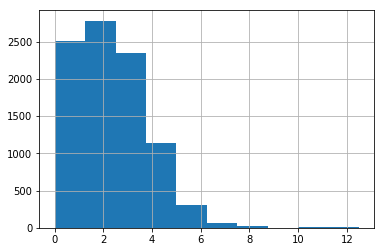

In [9]:
df['reviews_per_month'].hist(range=(0,12.5))

In [10]:
#df = df[df['reviews_per_month']>1]

Deleting the row which hasn't got more than 5 reviews in total.

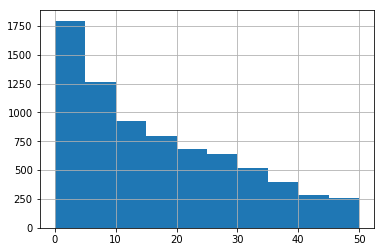

In [11]:
df['number_of_reviews'].hist(range=(0,50))

In [12]:
df = df[df['number_of_reviews']>5]

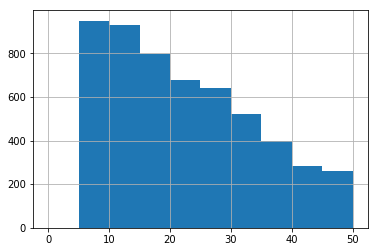

In [13]:
df['number_of_reviews'].hist(range=(0,50))

#### Filtering columns which is useful for price prediction.

In [14]:
column_list = ['id', 'neighbourhood', 'property_type', 'room_type', 'accommodates', 'bathrooms', 
               'bedrooms', 'beds', 'bed_type', 'square_feet', 'price', 'weekly_price', 'monthly_price',
               'guests_included', 'minimum_nights', 'maximum_nights', 'review_scores_rating'
              ]

df = df[column_list]
df.head()

,id,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,weekly_price,monthly_price,guests_included,minimum_nights,maximum_nights,review_scores_rating
1,197677,Sumida District,Apartment,Entire home/apt,4,1.0,1.0,2,Futon,NaN,"$10,975.00","$66,000.00","$240,000.00",1,3,365,95.0
2,289597,Nerima District,Apartment,Entire home/apt,2,1.0,1.0,1,Real Bed,220.0,"$4,196.00","$29,052.00","$150,642.00",1,30,180,95.0
3,370759,Setagaya District,Apartment,Entire home/apt,2,1.0,0.0,1,Real Bed,270.0,"$6,994.00","$56,009.00","$198,032.00",1,29,1125,95.0
4,700253,Nerima District,Apartment,Entire home/apt,2,1.0,1.0,1,Real Bed,NaN,"$3,981.00","$29,052.00","$150,642.00",1,30,180,96.0
5,776070,Kita District,House,Private room,2,1.0,1.0,1,Real Bed,NaN,"$6,456.00",NaN,NaN,1,3,14,99.0


#### Droping columns which have too many NaN.

In [15]:
df.isnull().mean()

id                      0.000000
neighbourhood           0.105828
property_type           0.000000
room_type               0.000000
accommodates            0.000000
bathrooms               0.000000
bedrooms                0.002399
beds                    0.000000
bed_type                0.000000
square_feet             0.998589
price                   0.000000
weekly_price            0.973473
monthly_price           0.977565
guests_included         0.000000
minimum_nights          0.000000
maximum_nights          0.000000
review_scores_rating    0.000000
dtype: float64

In [16]:
df =df.drop(['square_feet', 'weekly_price', 'monthly_price'], axis=1)

df.head()

,id,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,maximum_nights,review_scores_rating
1,197677,Sumida District,Apartment,Entire home/apt,4,1.0,1.0,2,Futon,"$10,975.00",1,3,365,95.0
2,289597,Nerima District,Apartment,Entire home/apt,2,1.0,1.0,1,Real Bed,"$4,196.00",1,30,180,95.0
3,370759,Setagaya District,Apartment,Entire home/apt,2,1.0,0.0,1,Real Bed,"$6,994.00",1,29,1125,95.0
4,700253,Nerima District,Apartment,Entire home/apt,2,1.0,1.0,1,Real Bed,"$3,981.00",1,30,180,96.0
5,776070,Kita District,House,Private room,2,1.0,1.0,1,Real Bed,"$6,456.00",1,3,14,99.0


#### Checking types

In [17]:
df.dtypes

id                        int64
neighbourhood            object
property_type            object
room_type                object
accommodates              int64
bathrooms               float64
bedrooms                float64
beds                      int64
bed_type                 object
price                    object
guests_included           int64
minimum_nights            int64
maximum_nights            int64
review_scores_rating    float64
dtype: object

-> I need to change dtypes in price and extra_people.

In [18]:
df['price'] =df['price'].str[1:-3].str.replace(',','').astype(np.int)

df['price'].dtypes

dtype('int64')

#### Create new column, "Price per person"

In [19]:
df['price_per_person'] = df['price']/df['guests_included']

In [20]:
df = df.drop(['price', 'guests_included'], axis=1)

In [21]:
df.head()

,id,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,minimum_nights,maximum_nights,review_scores_rating,price_per_person
1,197677,Sumida District,Apartment,Entire home/apt,4,1.0,1.0,2,Futon,3,365,95.0,10975.0
2,289597,Nerima District,Apartment,Entire home/apt,2,1.0,1.0,1,Real Bed,30,180,95.0,4196.0
3,370759,Setagaya District,Apartment,Entire home/apt,2,1.0,0.0,1,Real Bed,29,1125,95.0,6994.0
4,700253,Nerima District,Apartment,Entire home/apt,2,1.0,1.0,1,Real Bed,30,180,96.0,3981.0
5,776070,Kita District,House,Private room,2,1.0,1.0,1,Real Bed,3,14,99.0,6456.0


#### Dropping the row which price is unrealistic.
(Droping the row which price is over )

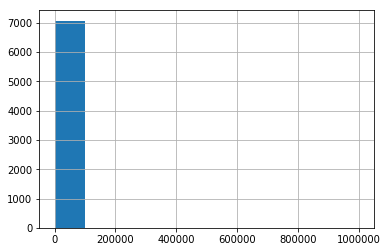

In [22]:
df['price_per_person'].hist()

In [23]:
df = df[df['price_per_person']<20000]
df = df[df['price_per_person']>2000]

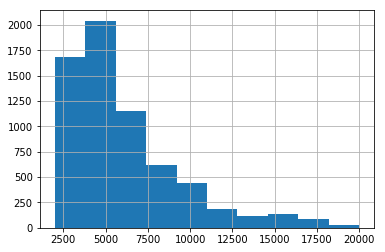

In [24]:
df['price_per_person'].hist()

In [25]:
df['price_per_person'].describe()

count     6497.000000
mean      6056.828625
std       3298.654170
min       2001.400000
25%       3766.000000
50%       5003.500000
75%       7317.000000
max      19992.400000
Name: price_per_person, dtype: float64

In [26]:
df.sort_values('price_per_person', ascending=False)

,id,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,minimum_nights,maximum_nights,review_scores_rating,price_per_person
665,11262743,Aoyama,House,Entire home/apt,12,3.5,5.0,9,Real Bed,2,14,93.0,19992.400000
38,2075509,Minato District,House,Entire home/apt,9,2.5,4.0,9,Real Bed,3,1125,98.0,19987.000000
7847,31104721,Toshima District,House,Entire home/apt,8,1.0,2.0,2,Real Bed,2,150,98.0,19987.000000
8229,31655278,Shibuya District,Apartment,Entire home/apt,2,1.0,1.0,2,Real Bed,2,1125,95.0,19906.000000
4965,27243109,Ikebukuro,Apartment,Entire home/apt,2,1.0,1.0,1,Real Bed,2,90,84.0,19799.000000
6902,29971823,Shibuya District,Apartment,Entire home/apt,3,1.0,0.0,2,Real Bed,2,10,97.0,19583.000000
3862,25096247,Shibuya,Apartment,Entire home/apt,3,1.0,0.0,2,Real Bed,2,90,99.0,19583.000000
3860,25095499,Shibuya District,Apartment,Entire home/apt,3,1.0,0.0,2,Real Bed,2,90,99.0,19583.000000
1861,18950296,Asakusa/Ueno,Apartment,Entire home/apt,4,1.0,1.0,3,Real Bed,2,1125,85.0,19368.000000
1732,18182560,Toshima District,Apartment,Entire home/apt,3,1.0,1.0,2,Real Bed,2,1125,89.0,19368.000000


### 4. Model Data

#### Checking correlation between variables

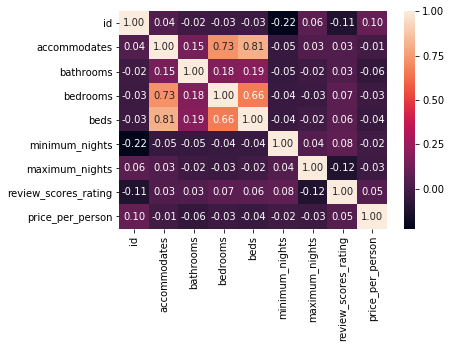

In [27]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

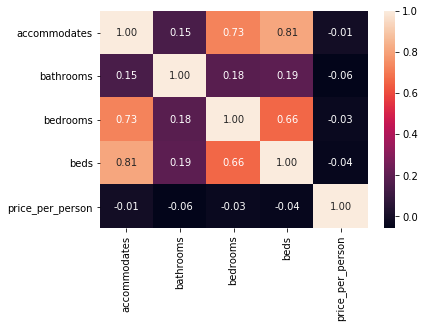

In [28]:
sns.heatmap(df[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price_per_person']].corr(), annot=True, fmt=".2f");

-> I'll drop bathrooms, bedrooms and beds. That's because they have strong correlation each other. 

In [29]:
df = df.drop(['bedrooms', 'beds'], axis=1)

In [30]:
df.head()

,id,neighbourhood,property_type,room_type,accommodates,bathrooms,bed_type,minimum_nights,maximum_nights,review_scores_rating,price_per_person
1,197677,Sumida District,Apartment,Entire home/apt,4,1.0,Futon,3,365,95.0,10975.0
2,289597,Nerima District,Apartment,Entire home/apt,2,1.0,Real Bed,30,180,95.0,4196.0
3,370759,Setagaya District,Apartment,Entire home/apt,2,1.0,Real Bed,29,1125,95.0,6994.0
4,700253,Nerima District,Apartment,Entire home/apt,2,1.0,Real Bed,30,180,96.0,3981.0
5,776070,Kita District,House,Private room,2,1.0,Real Bed,3,14,99.0,6456.0


#### Creating X and y for modeling

In [31]:
# Drop the row which neighbourhood column is NaN.
# (I assume that the price mechanism at the center of Tokyo is defferent from one at outside of Tokyo.)
df['neighbourhood'].dropna(how='any', axis=0, inplace=True)

# Deleting id column
#df = df.drop('id', axis=1)

# Creating the list for int and float
flo_df = df.select_dtypes(include=['int', 'float'])
flo_cols_lst = flo_df.columns

# Inputting the average value into Nan
for col in flo_cols_lst:
    df[col] =df[col].fillna(df[col].mean())

# Pull a list of the column names of the categorical variables
cat_df = df.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns

# Creating dummy for the categorical variables
for col in cat_cols_lst:
    try:
    # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)
    except:
        continue


y = df['price_per_person']
X = df.drop(['price_per_person'], axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.30, random_state=40)

In [33]:
# Cell for your computations to answer the next question
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict and score the model
y_test_preds =lm_model.predict(X_test)  
y_train_preds =lm_model.predict(X_train)

test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

print(test_score)
print(train_score)

-3.554562837784497e+25
0.15244156937729925


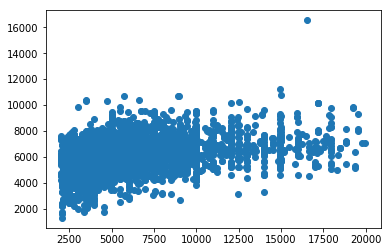

In [34]:
plt.scatter(y_train, y_train_preds)

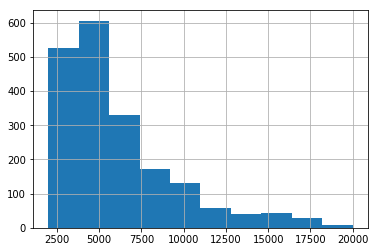

In [35]:
y_test.hist()

In [36]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
17,neighbourhood_Harajuku,-8.964035e+17,8.964035e+17
24,neighbourhood_Nakameguro,-2.158162e+12,2.158162e+12
60,property_type_Tent,9.507587e+03,9.507587e+03
6,neighbourhood_Akasaka,4.889246e+03,4.889246e+03
66,bed_type_Couch,-4.082243e+03,4.082243e+03
68,bed_type_Pull-out Sofa,-4.042121e+03,4.042121e+03
39,neighbourhood_Tsukiji,3.641418e+03,3.641418e+03
30,neighbourhood_Shibuya,3.536795e+03,3.536795e+03
44,property_type_Bungalow,-3.474446e+03,3.474446e+03
65,room_type_Shared room,-3.407897e+03,3.407897e+03


### Question1 ... which area is more expensive at the center of Tokyo for staying via Airbnb?  

In [109]:
def checking_coefs(word, rank):
    graph_df = coef_df[coef_df['est_int'].str.contains(word)].sort_values('coefs', ascending=False).head(rank)
    plt.figure(figsize = [8,6])
    base_color = sns.color_palette()[0]
    sns.barplot(data=graph_df, y='est_int', x='coefs', color=base_color)
    plt.xlabel('')
    plt.ylabel(word)
    plt.title(word + ' coefficient ranking')
    return 

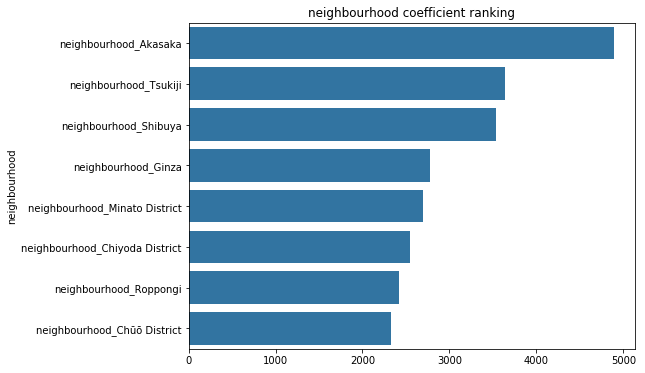

In [111]:
checking_coefs('neighbourhood', 8);

#### Answer: No.1 Akasaka,  No2 Tsukiji,  No3 Shibuya
If the house is near famous sightseeing sopts, the staying fee might be more expensive.

### Question2 ... If an owner has good rating, is this house more expensive?  

In [117]:
df_rate=pd.DataFrame(df[['review_scores_rating', 'price_per_person']])

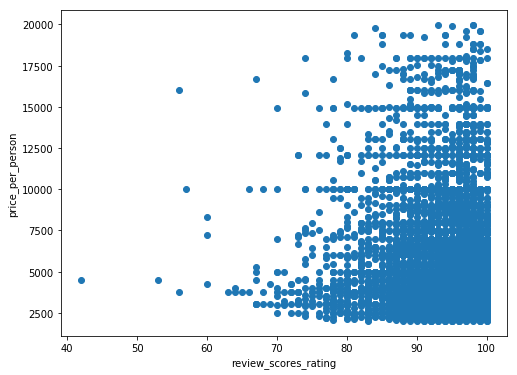

In [128]:
plt.figure(figsize = [8,6])
plt.scatter(df['review_scores_rating'], df['price_per_person'])
plt.xlabel('review_scores_rating')
plt.ylabel('price_per_person');

#### Answer: The correlation is very weak.
Even if the staying fee is not expensive, many visitor put good rating.

### Question3 ... If the house uses 'Futon'(Japanese traditional bed) , is the staying fee more expensive?

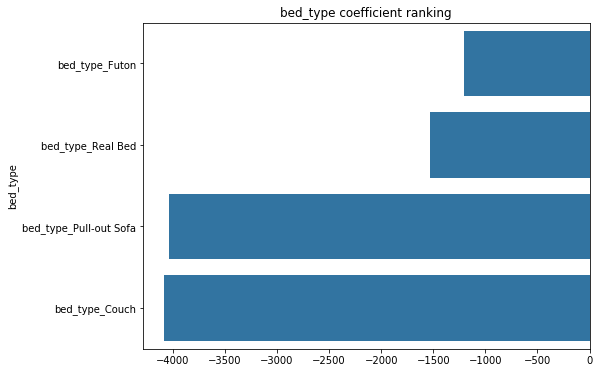

In [129]:
checking_coefs('bed_type', 10);

#### Answer: If the house uses 'Futon'(Japanese traditional bed) , the staying fee is more expensive than Real Bed.